<a href="https://colab.research.google.com/github/stho382/ENGSCI_Group_6_OR/blob/main/OR_visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary packages and data

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine
% matplotlib inline

In [48]:
demands_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/WoolworthsDemands.csv')
distances_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/WoolworthsDistances.csv')
locations_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/WoolworthsLocations.csv')
travel_durations_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/WoolworthsTravelDurations.csv')

In [49]:
demands_df

,Store,2021-06-14,2021-06-15,2021-06-16,2021-06-17,2021-06-18,2021-06-19,2021-06-20,2021-06-21,2021-06-22,2021-06-23,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11
0,Countdown Airport,5,6,10,11,7,5,0,7,8,5,8,3,5,0,6,10,5,6,7,6,0,8,6,8,9,7,3,0
1,Countdown Auckland City,6,8,5,8,8,2,0,8,8,13,11,8,4,0,6,8,9,10,6,3,0,11,7,7,9,5,5,0
2,Countdown Aviemore Drive,9,9,8,7,14,4,0,6,10,6,5,6,4,0,8,8,10,3,10,6,0,7,9,4,6,9,2,0
3,Countdown Birkenhead,9,4,8,10,7,5,0,5,6,12,10,11,2,0,7,5,10,10,7,6,0,9,9,5,4,12,4,0
4,Countdown Blockhouse Bay,6,8,7,6,6,2,0,9,4,8,10,9,2,0,6,7,9,9,7,3,0,8,8,4,10,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,SuperValue Avondale,3,2,6,6,4,0,0,3,8,5,3,3,0,0,4,5,2,5,5,0,0,5,5,5,5,5,0,0
61,SuperValue Flatbush,6,7,4,3,5,0,0,4,6,4,3,7,0,0,7,5,3,5,3,0,0,5,4,5,4,3,0,0
62,SuperValue Palomino,4,2,2,6,3,0,0,7,6,6,5,4,0,0,6,4,3,5,5,0,0,5,5,5,7,7,0,0
63,SuperValue Papakura,4,6,4,5,5,0,0,7,4,3,6,3,0,0,3,4,6,2,6,0,0,6,6,6,3,6,0,0


In [50]:
# Checking if each store entered in unique
demands_df['Store'].is_unique

True

In [51]:
# Converting the stores into the index
demands_df.set_index("Store", inplace = True)
demands_df

,2021-06-14,2021-06-15,2021-06-16,2021-06-17,2021-06-18,2021-06-19,2021-06-20,2021-06-21,2021-06-22,2021-06-23,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Countdown Airport,5,6,10,11,7,5,0,7,8,5,8,3,5,0,6,10,5,6,7,6,0,8,6,8,9,7,3,0
Countdown Auckland City,6,8,5,8,8,2,0,8,8,13,11,8,4,0,6,8,9,10,6,3,0,11,7,7,9,5,5,0
Countdown Aviemore Drive,9,9,8,7,14,4,0,6,10,6,5,6,4,0,8,8,10,3,10,6,0,7,9,4,6,9,2,0
Countdown Birkenhead,9,4,8,10,7,5,0,5,6,12,10,11,2,0,7,5,10,10,7,6,0,9,9,5,4,12,4,0
Countdown Blockhouse Bay,6,8,7,6,6,2,0,9,4,8,10,9,2,0,6,7,9,9,7,3,0,8,8,4,10,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SuperValue Avondale,3,2,6,6,4,0,0,3,8,5,3,3,0,0,4,5,2,5,5,0,0,5,5,5,5,5,0,0
SuperValue Flatbush,6,7,4,3,5,0,0,4,6,4,3,7,0,0,7,5,3,5,3,0,0,5,4,5,4,3,0,0
SuperValue Palomino,4,2,2,6,3,0,0,7,6,6,5,4,0,0,6,4,3,5,5,0,0,5,5,5,7,7,0,0


In [52]:
distances_df

,Unnamed: 0,Countdown Airport,Countdown Auckland City,Countdown Aviemore Drive,Countdown Birkenhead,Countdown Blockhouse Bay,Countdown Botany Downs,Countdown Browns Bay,Countdown Glenfield,Countdown Greenlane,Countdown Grey Lynn,Countdown Grey Lynn Central,Countdown Hauraki Corner,Countdown Henderson,Countdown Highland Park,Countdown Hobsonville,Countdown Howick,Countdown Kelston,Countdown Lincoln Road,Countdown Lynfield,Countdown Lynmall,Countdown Mairangi Bay,Countdown Mangere East,Countdown Mangere Mall,Countdown Manukau,Countdown Manukau Mall,Countdown Manurewa,Countdown Meadowbank,Countdown Meadowlands,Countdown Milford,Countdown Mt Eden,Countdown Mt Roskill,Countdown Mt Wellington,Countdown Newmarket,Countdown Northcote,Countdown Northwest,Countdown Onehunga,Countdown Pakuranga,Countdown Papakura,Countdown Papatoetoe,Countdown Ponsonby,Countdown Pt Chevalier,Countdown Roselands,Countdown St Johns,Countdown St Lukes,Countdown Sunnynook,Countdown Sylvia Park,Countdown Takanini,Countdown Takapuna,Countdown Te Atatu,Countdown Te Atatu South,Countdown Three Kings,Countdown Victoria Street West,Countdown Westgate,Countdown Metro Albert Street,Countdown Metro Halsey Street,Distribution Centre Auckland,FreshChoice Glen Eden,FreshChoice Half Moon Bay,FreshChoice Mangere Bridge,FreshChoice Otahuhu,FreshChoice Ranui,SuperValue Avondale,SuperValue Flatbush,SuperValue Palomino,SuperValue Papakura,SuperValue Titirangi
0,Countdown Airport,0.00,27376.70,22848.24,32893.50,18711.81,17010.24,45058.13,38153.57,17189.17,24015.25,22916.03,34177.29,27673.39,22968.20,34911.61,22182.72,21707.80,27454.02,15428.93,19406.94,41598.46,7563.16,5040.17,9917.05,9714.52,9528.20,19657.23,19996.02,36634.63,17612.19,15015.94,20777.11,27273.93,32788.73,30498.09,10798.95,18893.74,21968.05,9305.02,23875.21,23393.50,19174.11,21100.64,18835.44,37459.64,20233.73,17065.31,33502.91,26252.03,25059.22,13339.05,27028.28,30261.17,26734.21,26527.88,8247.28,24180.02,24538.72,7522.97,11830.65,30136.89,17975.54,11664.92,31348.46,22073.37,23907.27
1,Countdown Auckland City,27439.56,0.00,19474.76,8880.88,16477.28,19408.25,21045.52,14140.95,7596.66,4600.53,8902.53,10164.67,16881.36,19594.72,24119.58,23368.37,14490.63,16661.99,15748.10,13098.24,17585.84,25829.20,26733.08,21395.01,22293.54,28209.37,11077.70,22328.62,12622.01,7182.40,14189.92,13091.97,4645.74,8776.11,19706.06,19202.97,15520.26,34113.73,19213.64,3400.90,7873.69,31319.80,9875.62,8387.84,13447.03,12548.59,29210.99,9490.29,15460.00,14267.19,9157.34,1315.63,19469.14,681.82,1957.17,23019.50,16889.68,21165.24,20841.44,16559.38,19344.86,11457.54,22647.23,20556.42,34219.06,21672.74
2,Countdown Aviemore Drive,26158.92,19344.59,0.00,26130.53,30918.25,4125.45,38295.16,31390.60,13275.08,21327.36,21353.53,27414.31,31322.33,320.83,38560.56,3973.46,28931.60,31102.97,30189.07,27539.21,34835.49,21102.16,21852.97,11670.74,12195.37,18533.82,11334.96,4132.61,29871.66,17831.43,28630.90,7577.49,18087.37,26025.75,34147.03,12615.30,4313.98,24443.21,12195.61,19916.27,22314.67,22128.76,8604.32,22828.81,30696.67,8483.41,19540.47,26739.94,29900.97,28708.17,19167.68,18980.70,33910.11,19967.63,23002.68,13931.78,31330.65,2867.77,15459.00,10856.87,33785.84,25898.52,9807.31,34997.40,24548.54,36113.71
3,Countdown Birkenhead,33332.25,9420.07,26589.73,0.00,22369.97,26523.22,17128.73,3659.91,14711.63,8423.66,9637.82,6247.88,22774.05,26709.69,20016.99,30483.34,20383.32,22554.69,21640.79,18990.93,13669.05,31721.90,32625.78,28509.98,29408.52,35324.34,18192.67,29443.59,6885.63,14297.37,20082.62,20206.94,11760.71,2978.50,24176.13,25095.67,22635.23,41228.71,26328.61,9766.79,13766.39,38434.77,24842.13,14280.53,9530.24,19663.56,36325.96,5573.50,21352.69,20159.89,16272.31,8816.38,24516.92,8643.78,7882.21,28912.20,22782.37,28280.21,26734.13,23674.35,25237.56,17350.24,29762.20,26449.12,41334.03,27565.43
4,Countdown Blockhouse Bay,18693.60,16198.47,30924.72,21715.26,0.00,31204.03,33879.89,26975.33,19046.62,12837.01,11737.79,22999.05,10006.78,31044.68,23733.38,3

In [53]:
# Checking if the values in in the first column are unique
distances_df['Unnamed: 0'].is_unique

True

In [54]:
# Changing the first column to an index and replacing its name to 'Store'
distances_df.set_index("Unnamed: 0", inplace = True)
distances_df.index.name = 'Store'
distances_df

,Countdown Airport,Countdown Auckland City,Countdown Aviemore Drive,Countdown Birkenhead,Countdown Blockhouse Bay,Countdown Botany Downs,Countdown Browns Bay,Countdown Glenfield,Countdown Greenlane,Countdown Grey Lynn,Countdown Grey Lynn Central,Countdown Hauraki Corner,Countdown Henderson,Countdown Highland Park,Countdown Hobsonville,Countdown Howick,Countdown Kelston,Countdown Lincoln Road,Countdown Lynfield,Countdown Lynmall,Countdown Mairangi Bay,Countdown Mangere East,Countdown Mangere Mall,Countdown Manukau,Countdown Manukau Mall,Countdown Manurewa,Countdown Meadowbank,Countdown Meadowlands,Countdown Milford,Countdown Mt Eden,Countdown Mt Roskill,Countdown Mt Wellington,Countdown Newmarket,Countdown Northcote,Countdown Northwest,Countdown Onehunga,Countdown Pakuranga,Countdown Papakura,Countdown Papatoetoe,Countdown Ponsonby,Countdown Pt Chevalier,Countdown Roselands,Countdown St Johns,Countdown St Lukes,Countdown Sunnynook,Countdown Sylvia Park,Countdown Takanini,Countdown Takapuna,Countdown Te Atatu,Countdown Te Atatu South,Countdown Three Kings,Countdown Victoria Street West,Countdown Westgate,Countdown Metro Albert Street,Countdown Metro Halsey Street,Distribution Centre Auckland,FreshChoice Glen Eden,FreshChoice Half Moon Bay,FreshChoice Mangere Bridge,FreshChoice Otahuhu,FreshChoice Ranui,SuperValue Avondale,SuperValue Flatbush,SuperValue Palomino,SuperValue Papakura,SuperValue Titirangi
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Countdown Airport,0.00,27376.70,22848.24,32893.50,18711.81,17010.24,45058.13,38153.57,17189.17,24015.25,22916.03,34177.29,27673.39,22968.20,34911.61,22182.72,21707.80,27454.02,15428.93,19406.94,41598.46,7563.16,5040.17,9917.05,9714.52,9528.20,19657.23,19996.02,36634.63,17612.19,15015.94,20777.11,27273.93,32788.73,30498.09,10798.95,18893.74,21968.05,9305.02,23875.21,23393.50,19174.11,21100.64,18835.44,37459.64,20233.73,17065.31,33502.91,26252.03,25059.22,13339.05,27028.28,30261.17,26734.21,26527.88,8247.28,24180.02,24538.72,7522.97,11830.65,30136.89,17975.54,11664.92,31348.46,22073.37,23907.27
Countdown Auckland City,27439.56,0.00,19474.76,8880.88,16477.28,19408.25,21045.52,14140.95,7596.66,4600.53,8902.53,10164.67,16881.36,19594.72,24119.58,23368.37,14490.63,16661.99,15748.10,13098.24,17585.84,25829.20,26733.08,21395.01,22293.54,28209.37,11077.70,22328.62,12622.01,7182.40,14189.92,13091.97,4645.74,8776.11,19706.06,19202.97,15520.26,34113.73,19213.64,3400.90,7873.69,31319.80,9875.62,8387.84,13447.03,12548.59,29210.99,9490.29,15460.00,14267.19,9157.34,1315.63,19469.14,681.82,1957.17,23019.50,16889.68,21165.24,20841.44,16559.38,19344.86,11457.54,22647.23,20556.42,34219.06,21672.74
Countdown Aviemore Drive,26158.92,19344.59,0.00,26130.53,30918.25,4125.45,38295.16,31390.60,13275.08,21327.36,21353.53,27414.31,31322.33,320.83,38560.56,3973.46,28931.60,31102.97,30189.07,27539.21,34835.49,21102.16,21852.97,11670.74,12195.37,18533.82,11334.96,4132.61,29871.66,17831.43,28630.90,7577.49,18087.37,26025.75,34147.03,12615.30,4313.98,24443.21,12195.61,19916.27,22314.67,22128.76,8604.32,22828.81,30696.67,8483.41,19540.47,26739.94,29900.97,28708.17,19167.68,18980.70,33910.11,19967.63,23002.68,13931.78,31330.65,2867.77,15459.00,10856.87,33785.84,25898.52,9807.31,34997.40,24548.54,36113.71
Countdown Birkenhead,33332.25,9420.07,26589.73,0.00,22369.97,26523.22,17128.73,3659.91,14711.63,8423.66,9637.82,6247.88,22774.05,26709.69,20016.99,30483.34,20383.32,22554.69,21640.79,18990.93,13669.05,31721.90,32625.78,28509.98,29408.52,35324.34,18192.67,29443.59,6885.63,14297.37,20082.62,20206.94,11760.71,2978.50,24176.13,25095.67,22635.23,41228.71,26328.61,9766.79,13766.39,38434.77,24842.13,14280.53,9530.24,19663.56,36325.96,5573.50,21352.69,20159.89,16272.31,8816.38,24516.92,8643.78,7882.21,28912.20,22782.37,28280.21,26734.13,23674.35,25237.56,17350.24,29762.20,26449.12,41334.03,27565.43
Countdown Blockhouse Bay,18693.60,16198.47,30924.72,21715.26,0.00,31204.03,33879.89,26975.33,19046.62,1283

In [56]:
locations_df

,Type,Location,Store,Lat,Long
0,Countdown,Airport,Countdown Airport,-36.997370,174.788882
1,Countdown,Auckland City,Countdown Auckland City,-36.844962,174.773119
2,Countdown,Aviemore Drive,Countdown Aviemore Drive,-36.898878,174.906570
3,Countdown,Birkenhead,Countdown Birkenhead,-36.811118,174.724878
4,Countdown,Blockhouse Bay,Countdown Blockhouse Bay,-36.922919,174.702352
...,...,...,...,...,...
61,SuperValue,Avondale,SuperValue Avondale,-36.897769,174.697410
62,SuperValue,Flatbush,SuperValue Flatbush,-36.976767,174.897227
63,SuperValue,Palomino,SuperValue Palomino,-36.882876,174.616179
64,SuperValue,Papakura,SuperValue Papakura,-37.066063,174.955698


In [57]:
# Checking if the values in in the first column are unique
locations_df['Store'].is_unique

True

In [58]:
# Setting the 'Store column to be the index
locations_df.set_index('Store', inplace=True)
locations_df

,Type,Location,Lat,Long
Store,,,,
Countdown Airport,Countdown,Airport,-36.997370,174.788882
Countdown Auckland City,Countdown,Auckland City,-36.844962,174.773119
Countdown Aviemore Drive,Countdown,Aviemore Drive,-36.898878,174.906570
Countdown Birkenhead,Countdown,Birkenhead,-36.811118,174.724878
Countdown Blockhouse Bay,Countdown,Blockhouse Bay,-36.922919,174.702352
...,...,...,...,...
SuperValue Avondale,SuperValue,Avondale,-36.897769,174.697410
SuperValue Flatbush,SuperValue,Flatbush,-36.976767,174.897227
SuperValue Palomino,SuperValue,Palomino,-36.882876,174.616179


In [59]:
travel_duration_df

,Unnamed: 0,Countdown Airport,Countdown Auckland City,Countdown Aviemore Drive,Countdown Birkenhead,Countdown Blockhouse Bay,Countdown Botany Downs,Countdown Browns Bay,Countdown Glenfield,Countdown Greenlane,Countdown Grey Lynn,Countdown Grey Lynn Central,Countdown Hauraki Corner,Countdown Henderson,Countdown Highland Park,Countdown Hobsonville,Countdown Howick,Countdown Kelston,Countdown Lincoln Road,Countdown Lynfield,Countdown Lynmall,Countdown Mairangi Bay,Countdown Mangere East,Countdown Mangere Mall,Countdown Manukau,Countdown Manukau Mall,Countdown Manurewa,Countdown Meadowbank,Countdown Meadowlands,Countdown Milford,Countdown Mt Eden,Countdown Mt Roskill,Countdown Mt Wellington,Countdown Newmarket,Countdown Northcote,Countdown Northwest,Countdown Onehunga,Countdown Pakuranga,Countdown Papakura,Countdown Papatoetoe,Countdown Ponsonby,Countdown Pt Chevalier,Countdown Roselands,Countdown St Johns,Countdown St Lukes,Countdown Sunnynook,Countdown Sylvia Park,Countdown Takanini,Countdown Takapuna,Countdown Te Atatu,Countdown Te Atatu South,Countdown Three Kings,Countdown Victoria Street West,Countdown Westgate,Countdown Metro Albert Street,Countdown Metro Halsey Street,Distribution Centre Auckland,FreshChoice Glen Eden,FreshChoice Half Moon Bay,FreshChoice Mangere Bridge,FreshChoice Otahuhu,FreshChoice Ranui,SuperValue Avondale,SuperValue Flatbush,SuperValue Palomino,SuperValue Papakura,SuperValue Titirangi
0,Countdown Airport,0.00,1956.46,2330.68,2340.24,1427.97,1971.09,3355.17,2698.02,1519.18,1748.91,1592.39,2563.05,2151.22,2360.93,2442.10,2491.97,1870.74,1920.83,1235.13,1559.70,2975.30,758.55,497.92,1235.47,1114.82,1153.91,1838.49,2250.27,2750.99,1478.86,1220.49,1846.27,1868.32,2329.30,2060.01,906.84,1857.78,1947.71,1079.19,1701.53,1672.67,1820.60,2048.99,1465.47,2679.79,1776.50,1619.28,2425.17,1995.26,1745.06,1071.27,1923.66,2094.95,1966.50,1954.68,779.33,1931.93,2382.29,609.48,1183.03,2295.89,1365.38,1428.50,2348.63,1985.56,1838.82
1,Countdown Auckland City,2012.12,0.00,1946.04,974.09,1444.67,1879.06,1989.02,1331.87,812.54,718.01,863.65,1196.91,1631.06,1976.29,1921.94,2311.26,1557.88,1400.67,1380.58,1345.44,1609.16,1872.60,1979.81,1668.79,1718.91,2228.16,1176.48,2128.46,1384.84,863.97,1265.88,1198.41,575.78,963.16,1539.85,1462.31,1473.14,2507.72,1614.90,571.59,819.14,2380.61,1226.33,898.15,1313.65,1128.63,2179.29,1059.03,1475.10,1224.90,1046.63,227.98,1574.79,127.69,357.71,1762.92,1660.28,1997.65,1560.01,1425.20,1775.73,1099.29,1788.78,1828.47,2545.57,1855.52
2,Countdown Aviemore Drive,2372.59,1887.28,0.00,2299.64,2634.80,508.15,3314.57,2657.42,1379.06,2007.33,2005.99,2522.46,2821.18,81.56,3112.07,391.32,2748.00,2590.80,2570.71,2535.57,2934.71,2041.49,2101.07,1374.09,1444.44,2004.00,1376.19,411.35,2710.39,1783.98,2456.00,1008.77,1688.94,2288.71,2729.98,1502.04,673.55,2317.23,1506.92,1874.91,2009.27,2135.15,1129.18,2088.28,2639.19,1177.18,1988.80,2384.57,2665.23,2415.03,1886.07,1830.45,2764.92,1946.73,2046.17,1711.71,2850.41,320.24,1832.95,1360.17,2965.85,2289.42,1134.20,3018.60,2355.08,3045.65
3,Countdown Birkenhead,2495.19,1099.88,2427.33,0.00,1927.73,2360.36,1612.15,492.81,1293.84,841.71,1006.12,820.04,2114.12,2457.59,1586.06,2792.55,2040.94,1883.73,1863.64,1828.51,1232.29,2355.67,2462.88,2150.09,2200.21,2709.45,1657.78,2609.76,907.97,1345.27,1748.94,1679.71,1057.08,360.69,1729.17,1945.38,1954.44,2989.02,2096.20,1020.58,1302.21,2861.91,2145.65,1381.22,936.78,1609.93,2660.59,682.16,1958.17,1707.97,1527.93,976.65,1792.79,954.61,803.62,2245.99,2143.34,2478.95,2043.08,1906.50,2258.79,1582.36,2270.08,2311.53,3026.86,2338.59
4,Countdown Blockhouse Bay,1496.00,1413.39,2695.50,1797.16,0.00,2666.29,2812.09,2154.94,1562.00,1205.83,1049.32,2019.98,1206.98,2725.75,1899.02,3060.72,662.38,1377.75,352.06,463.60,2432.23,1356.48,1463.69,1919.97,1790.93,1904.59,1925.95,2877.93,2207.91,1109.34,710.14,1947.87,1325.24,1786.23,1516.93,946.18,2222.60,2623.82,1826.54,1158.45,810.55,2496.72,2413.81,830.02,2136.72,1878.09,2295.40,1882.09,1452

In [61]:
# Checking if the values in in the first column are unique
travel_durations_df['Unnamed: 0'].is_unique

True

In [62]:
# Changing the first column to an index and replacing its name to 'Store'
travel_durations_df.set_index("Unnamed: 0", inplace = True)
travel_durations_df.index.name = 'Store'
travel_durations_df

,Countdown Airport,Countdown Auckland City,Countdown Aviemore Drive,Countdown Birkenhead,Countdown Blockhouse Bay,Countdown Botany Downs,Countdown Browns Bay,Countdown Glenfield,Countdown Greenlane,Countdown Grey Lynn,Countdown Grey Lynn Central,Countdown Hauraki Corner,Countdown Henderson,Countdown Highland Park,Countdown Hobsonville,Countdown Howick,Countdown Kelston,Countdown Lincoln Road,Countdown Lynfield,Countdown Lynmall,Countdown Mairangi Bay,Countdown Mangere East,Countdown Mangere Mall,Countdown Manukau,Countdown Manukau Mall,Countdown Manurewa,Countdown Meadowbank,Countdown Meadowlands,Countdown Milford,Countdown Mt Eden,Countdown Mt Roskill,Countdown Mt Wellington,Countdown Newmarket,Countdown Northcote,Countdown Northwest,Countdown Onehunga,Countdown Pakuranga,Countdown Papakura,Countdown Papatoetoe,Countdown Ponsonby,Countdown Pt Chevalier,Countdown Roselands,Countdown St Johns,Countdown St Lukes,Countdown Sunnynook,Countdown Sylvia Park,Countdown Takanini,Countdown Takapuna,Countdown Te Atatu,Countdown Te Atatu South,Countdown Three Kings,Countdown Victoria Street West,Countdown Westgate,Countdown Metro Albert Street,Countdown Metro Halsey Street,Distribution Centre Auckland,FreshChoice Glen Eden,FreshChoice Half Moon Bay,FreshChoice Mangere Bridge,FreshChoice Otahuhu,FreshChoice Ranui,SuperValue Avondale,SuperValue Flatbush,SuperValue Palomino,SuperValue Papakura,SuperValue Titirangi
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Countdown Airport,0.00,1956.46,2330.68,2340.24,1427.97,1971.09,3355.17,2698.02,1519.18,1748.91,1592.39,2563.05,2151.22,2360.93,2442.10,2491.97,1870.74,1920.83,1235.13,1559.70,2975.30,758.55,497.92,1235.47,1114.82,1153.91,1838.49,2250.27,2750.99,1478.86,1220.49,1846.27,1868.32,2329.30,2060.01,906.84,1857.78,1947.71,1079.19,1701.53,1672.67,1820.60,2048.99,1465.47,2679.79,1776.50,1619.28,2425.17,1995.26,1745.06,1071.27,1923.66,2094.95,1966.50,1954.68,779.33,1931.93,2382.29,609.48,1183.03,2295.89,1365.38,1428.50,2348.63,1985.56,1838.82
Countdown Auckland City,2012.12,0.00,1946.04,974.09,1444.67,1879.06,1989.02,1331.87,812.54,718.01,863.65,1196.91,1631.06,1976.29,1921.94,2311.26,1557.88,1400.67,1380.58,1345.44,1609.16,1872.60,1979.81,1668.79,1718.91,2228.16,1176.48,2128.46,1384.84,863.97,1265.88,1198.41,575.78,963.16,1539.85,1462.31,1473.14,2507.72,1614.90,571.59,819.14,2380.61,1226.33,898.15,1313.65,1128.63,2179.29,1059.03,1475.10,1224.90,1046.63,227.98,1574.79,127.69,357.71,1762.92,1660.28,1997.65,1560.01,1425.20,1775.73,1099.29,1788.78,1828.47,2545.57,1855.52
Countdown Aviemore Drive,2372.59,1887.28,0.00,2299.64,2634.80,508.15,3314.57,2657.42,1379.06,2007.33,2005.99,2522.46,2821.18,81.56,3112.07,391.32,2748.00,2590.80,2570.71,2535.57,2934.71,2041.49,2101.07,1374.09,1444.44,2004.00,1376.19,411.35,2710.39,1783.98,2456.00,1008.77,1688.94,2288.71,2729.98,1502.04,673.55,2317.23,1506.92,1874.91,2009.27,2135.15,1129.18,2088.28,2639.19,1177.18,1988.80,2384.57,2665.23,2415.03,1886.07,1830.45,2764.92,1946.73,2046.17,1711.71,2850.41,320.24,1832.95,1360.17,2965.85,2289.42,1134.20,3018.60,2355.08,3045.65
Countdown Birkenhead,2495.19,1099.88,2427.33,0.00,1927.73,2360.36,1612.15,492.81,1293.84,841.71,1006.12,820.04,2114.12,2457.59,1586.06,2792.55,2040.94,1883.73,1863.64,1828.51,1232.29,2355.67,2462.88,2150.09,2200.21,2709.45,1657.78,2609.76,907.97,1345.27,1748.94,1679.71,1057.08,360.69,1729.17,1945.38,1954.44,2989.02,2096.20,1020.58,1302.21,2861.91,2145.65,1381.22,936.78,1609.93,2660.59,682.16,1958.17,1707.97,1527.93,976.65,1792.79,954.61,803.62,2245.99,2143.34,2478.95,2043.08,1906.50,2258.79,1582.36,2270.08,2311.53,3026.86,2338.59
Countdown Blockhouse Bay,1496.00,1413.39,2695.50,1797.16,0.00,2666.29,2812.09,2154.94,1562.00,1205.83,1049.32,2019.98,1206.98,2725.75,1899.02,3060.72,662.38,1377.75,352.06,463.60,2432.23,1356.48,1463.69,1919.97,1790.93,1904.59,1925.95,2877.93,2207.91,1109.34,710.14,1947.87,1325.24,1786.23,1516.93,946.18,2222.60,2623.82,1826.54,1158.45,810.55,2496.72,

In [84]:
# The distance dataframe has 65 rows and not 66 like the rest of the data frames - finding the missing row
set(distances_df.index).symmetric_difference(demands_df.index)

{'Distribution Centre Auckland'}

From the code above, it is evident that the 'Distribution Centre Auckland' label is missing from the ``demands_df`` data frame's index. 
Obviously, this is because a distribution centre is not accounted for when finding the demand 

# Data Visualisation

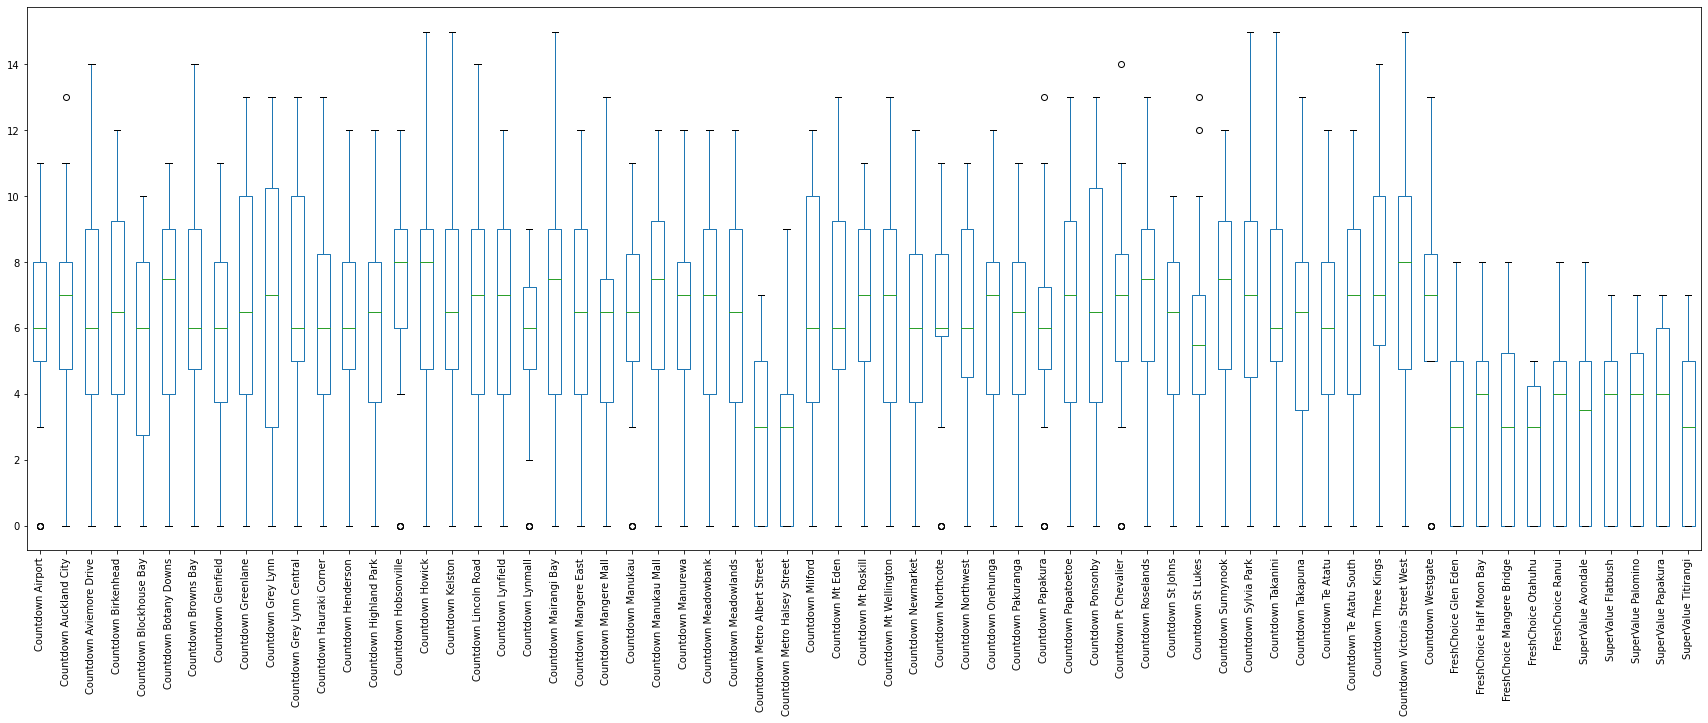

In [112]:
#Plotting a box a whisker plot showing the demand for each Woolworths store
demands_df.T.plot(kind='box', figsize=(30,10), rot=90)
plt.show()

In [93]:
# Finding the median number of pallets for each store (except the Distribution Centre)
median_df = pd.DataFrame(demands_df.iloc[:,0:demands_df.shape[1]].median(axis=1), columns=['Median Pallets'], index=demands_df.index.values)
median_df

,Median Pallets
Countdown Airport,6.0
Countdown Auckland City,7.0
Countdown Aviemore Drive,6.0
Countdown Birkenhead,6.5
Countdown Blockhouse Bay,6.0
...,...
SuperValue Avondale,3.5
SuperValue Flatbush,4.0
SuperValue Palomino,4.0
SuperValue Papakura,4.0
